In [67]:
import imageio 
from matplotlib import pyplot as plt
from skimage import data, io
import ipywidgets as widgets
from ipywidgets import Button, Layout
#from SimpleCV import Image
import cv2
from skimage import data, io, filters, exposure
import skimage.morphology as mp
import numpy as np
from skimage.filters import roberts, sobel, scharr, prewitt, frangi
from skimage import img_as_float
from skimage.color import rgb2hsv, hsv2rgb, rgb2gray
import cv2
import numpy as np

In [9]:
style = {'description_width': '40%'}

selector = widgets.Dropdown(
    options=[('Healthy eye 1', 'photos/01_h.jpg'), ('Healthy eye 2', 'photos/02_h.jpg'), 
             ('Healthy eye 3', 'photos/03_h.jpg'), ('Healthy eye 4', 'photos/04_h.jpg'),
            ('Healthy eye 5', 'photos/05_h.jpg'), ('Healthy eye 6', 'photos/06_h.jpg'),
            ('Healthy eye 7', 'photos/07_h.jpg'), ('Healthy eye 8', 'photos/08_h.jpg'), 
            ('Healthy eye 9', 'photos/09_h.jpg'), ('Healthy eye 10', 'photos/10_h.jpg'),
            ('Healthy eye 11', 'photos/11_h.jpg'), ('Healthy eye 12', 'photos/12_h.jpg'), 
            ('Healthy eye 13', 'photos/13_h.jpg'), ('Healthy eye 14', 'photos/14_h.jpg'), 
            ('Healthy eye 15', 'photos/15_h.jpg')],
    value='photos/01_h.jpg',
    description='Image:',
    layout=Layout(width='50%', height='30px'),
    style=style
)

display(selector)

Dropdown(description='Image:', layout=Layout(height='30px', width='50%'), options=(('Healthy eye 1', 'photos/0…

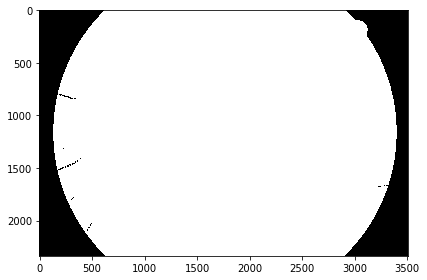

In [14]:
image = img_as_float(cv2.imread(selector.value))
def create_mask(image):
    img = rgb2gray(image)
    img[img[:, :] > 0.1] = 1
    img[img[:, :] <= 0.1] = 0
    return img
img = create_mask(image)
io.imshow(img)

In [15]:
img = cv2.imread(selector.value,0)
equ = cv2.equalizeHist(img)
# create a CLAHE object (Arguments are optional)
#CLAHE (Contrast Limited Adaptive Histogram Equalization)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(img)
#Zsres2 = np.hstack((img,cl1))
#cv2.imwrite('hist_clahe1.jpg',cl1)


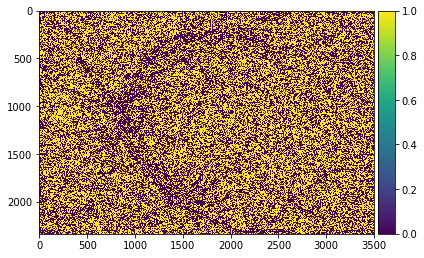

In [41]:
fig, ax = plt.subplots(nrows=1, ncols=1)
edges = filters.sobel(img)

low = 0.1
high = 0.35

lowt = (edges > high).astype(int)
io.imshow(lowt)

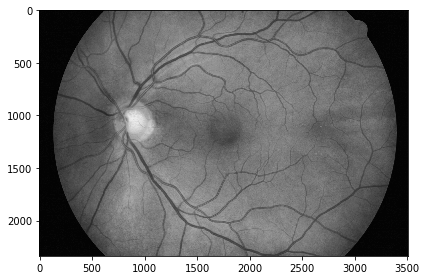

In [16]:
io.imshow(cl1)

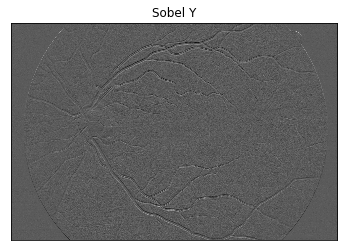

In [42]:
laplacian = cv2.Laplacian(cl1,cv2.CV_64F)
sobelx = cv2.Sobel(cl1,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(cl1,cv2.CV_64F,0,1,ksize=5)

plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()

0.8917064850980518
0.0
0.02209431504567161


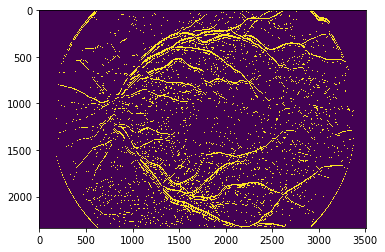

In [93]:
normalizedImg = np.zeros((800, 800))
normalizedImg = cv2.normalize(sobely,  normalizedImg, 0, 255, cv2.NORM_MINMAX)
frangi_fajen = frangi(normalizedImg)
matrixp = []
for row in frangi_fajen:
    rowp = []
    for elem in row:
        if elem > 0.06:
            elem = 1
        else:
            elem = 0.0
        rowp.append(elem)
    matrixp.append(rowp)
plt.imshow(matrixp)
print(frangi_fajen.max())
print(frangi_fajen.min())
print(frangi_fajen.mean())